# first100 Stats

In this notebook we analyze some statistics from the first 100 muram2hanlert jobs executed on cheyenne.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import os
import shutil

import muram
import hanlert
import muram2hanlert

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
os.getpid() # for checking memory/CPU in terminal

284924

## Plot FALC Atmosphere

In [5]:
atmos = hanlert.read_atmos(os.path.expanduser('~/hanlert/Atmos/FALC93_70.atmos'))

In [6]:
# Print height resolution dX along the atmosphere
d_atmos = atmos['height'][0:-1] - atmos['height'][1:]
print(d_atmos)

[  1.5500488    1.4499512    1.3498535    2.1601562    2.1699219
   1.1000977    1.119873     1.130127     1.1298828    0.57006836
   0.52001953   0.52001953   0.5300293    0.5          0.4699707
   0.45996094   0.47998047   0.38989258   0.27001953   0.40014648
   0.31982422   0.73999023   1.1000977    9.          22.
  28.          30.          23.          12.          13.
  19.          26.          37.          65.          55.
  85.         105.          90.         105.          97.
 100.          98.         115.          85.          75.
  50.          50.          50.          50.          55.
  50.          40.          35.          35.          40.
  50.          50.          50.          50.          50.
  50.          50.          50.          50.          20.
  20.          20.          20.          20.        ]


Text(0,0.5,'Temperature [K]')

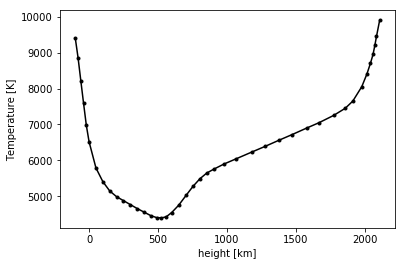

In [7]:
sel = atmos['T'] < 10000

fig, ax = plt.subplots()
ax.plot(atmos['height'][sel], atmos['T'][sel], 'k.-')
ax.set_xlabel('height [km]')
ax.set_ylabel('Temperature [K]')

## Plot MURaM atmosphere

In [8]:
dir2D = "/glade/p/hao/radmhd/rempel/Swirls/dyn_25x8Mm_16_pdmp_1_ext_zxy_pdm/2D"
dir3D = "/glade/p/hao/radmhd/rempel/Swirls/dyn_25x8Mm_16_pdmp_1_ext_zxy_pdm/3D"

In [9]:
iteration = 12000
snap = muram.MuramSnap(dir3D, iteration)

In [10]:
snap.available

['rho',
 'vx',
 'vy',
 'vz',
 'eint',
 'Bx',
 'By',
 'Bz',
 'T',
 'P',
 'Q',
 'tau',
 'Qres',
 'Qvis']

In [11]:
col = snap.column(0, 0)

Text(0,0.5,'Temperature [K]')

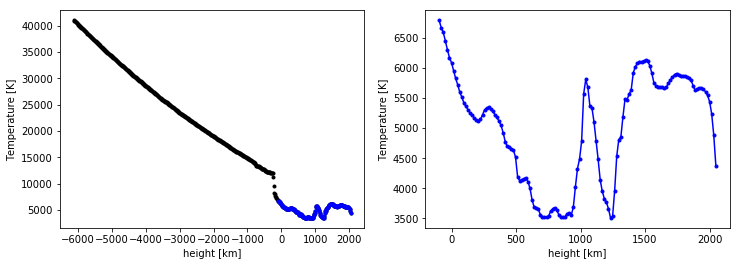

In [12]:
# Plot the whole atmosphere, highlighted the part sent to hanleRT (height > -100 km)
tau1_ix = (np.abs(col.tau - 1.0)).argmin()
height = (col.X - col.X[tau1_ix]) / 1e5 # km
sel = height >= -100.
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(height, col.T, 'k.')
ax1.plot(height[sel], col.T[sel], 'b.')
ax1.set_xlabel('height [km]')
ax1.set_ylabel('Temperature [K]')

ax2.plot(height[sel], col.T[sel], 'b.-')
ax2.set_xlabel('height [km]')
ax2.set_ylabel('Temperature [K]')

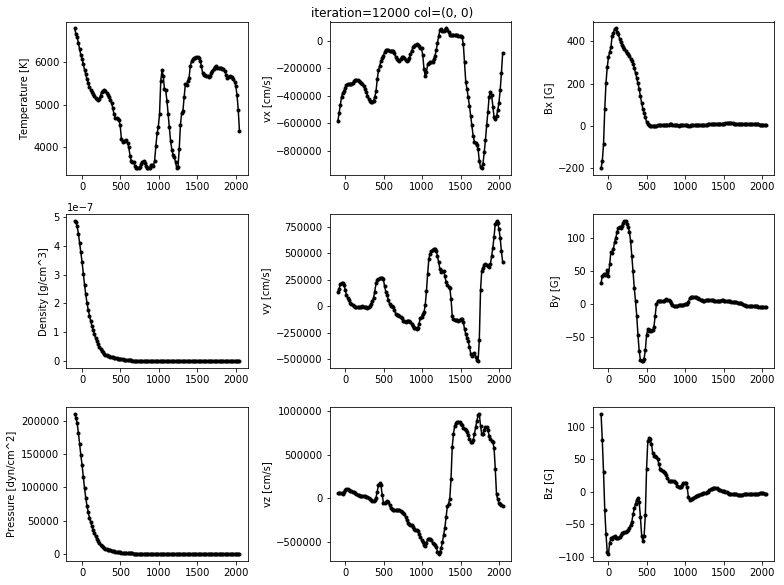

In [13]:
# Plot all the atmosphere variables that matter for RT
# Note: actually vy, vz don't matter
muram2hanlert.plot_atmos(col)

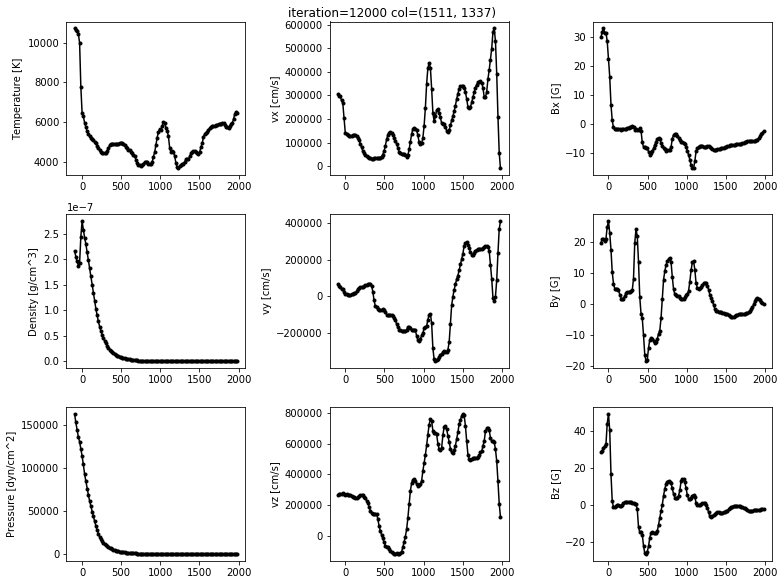

In [14]:
# A routine I wrote to explore the variability in atmospheres
# Just keep re-executing and have a look
muram2hanlert.plot_random_col(snap)

## Analyze First 100 Jobs

In [15]:
jobroot = os.path.expanduser("~/muram2hanlert")
jobname = 'first100'

In [16]:
muram2hanlert.job_status(jobroot, jobname, iteration, 0, 0)

('OK', 2091)

In [17]:
run_status = muram2hanlert.run_status(jobroot, jobname)

In [18]:
def T_mean(y, z):
    col = snap.column(y, z)
    tau1_ix = (np.abs(col.tau - 1.0)).argmin()
    height = (col.X - col.X[tau1_ix]) / 1e5 # km
    sel = height >= -100.
    return np.mean(col.T[sel])

T_mean(0, 0)

5021.4214

In [19]:
t_OK = []
p_OK = []
T_OK = []
for (y, z), (status, t) in run_status[iteration].items():
    if status == "OK":
        t_OK.append(t)
        p_OK.append((y, z))
        T_OK.append(T_mean(y, z))
    else:
        print("Job at", (y, z), "has status", status, "in", t)
t_OK = np.array(t_OK)
p_OK = np.array(p_OK)
T_OK = np.array(T_OK)
ix_sort = np.argsort(t_OK)
t_OK = t_OK[ix_sort]
p_OK = p_OK[ix_sort]
T_OK = T_OK[ix_sort]
N_OK = t_OK.size
print(N_OK, "jobs finished OK")

Job at (12, 12) has status FAIL in -0.4035656452178955
Job at (12, 16) has status FAIL in -0.7331757545471191
Job at (12, 24) has status FAIL in 2431
Job at (16, 32) has status FAIL in -1.335815668106079
Job at (20, 0) has status FAIL in -14512.845541238785
Job at (20, 4) has status FAIL in -14496.179078817368
Job at (20, 12) has status FAIL in -1.3465003967285156
Job at (20, 28) has status FAIL in -0.7578868865966797
Job at (20, 32) has status FAIL in -0.35611748695373535
Job at (20, 36) has status FAIL in -1.0219218730926514
Job at (24, 4) has status FAIL in -0.36667633056640625
Job at (24, 36) has status FAIL in -0.7595422267913818
Job at (28, 0) has status FAIL in -1.7970185279846191
Job at (28, 12) has status FAIL in 5781
Job at (32, 16) has status FAIL in -1.3270699977874756
Job at (32, 32) has status FAIL in 1750
Job at (32, 36) has status FAIL in -0.3106985092163086
Job at (36, 8) has status FAIL in -0.33615541458129883
82 jobs finished OK


median time: 29.408 minutes


Text(0.5,1,'Time of Completed Jobs')

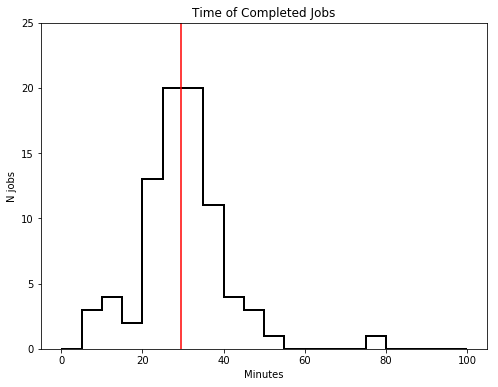

In [20]:
t_OK_med = np.median(t_OK / 60)
print(f"median time: {t_OK_med:0.3f} minutes")
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(t_OK / 60., bins=np.arange(0, 101, 5), histtype='step', color='k', lw=2)
ax.axvline(t_OK_med, c='r')
ax.set_yticks(np.arange(0, 25+1, 5))
ax.set_xlabel("Minutes")
ax.set_ylabel("N jobs")
ax.set_title("Time of Completed Jobs")

In [21]:
print("Columns sorted by execution time:")
for ix in range(len(t_OK)):
    print(f"{ix+1:2d} t={t_OK[ix]/60:0.1f} min, p={p_OK[ix]} T_mean={T_OK[ix]:0.1f}")

Columns sorted by execution time:
 1 t=7.5 min, p=[36 16] T_mean=4694.4
 2 t=8.6 min, p=[24  0] T_mean=5040.3
 3 t=9.6 min, p=[20  8] T_mean=4646.4
 4 t=10.7 min, p=[32 24] T_mean=4786.0
 5 t=10.8 min, p=[ 4 36] T_mean=4686.3
 6 t=12.1 min, p=[8 0] T_mean=4824.3
 7 t=12.2 min, p=[28  4] T_mean=4921.2
 8 t=19.6 min, p=[20 24] T_mean=4491.8
 9 t=19.7 min, p=[32 20] T_mean=4670.7
10 t=20.1 min, p=[36 28] T_mean=4941.8
11 t=20.2 min, p=[24  8] T_mean=4700.9
12 t=20.5 min, p=[16 16] T_mean=4460.8
13 t=21.6 min, p=[28 20] T_mean=4569.4
14 t=21.6 min, p=[28 24] T_mean=4704.3
15 t=22.4 min, p=[16  4] T_mean=4695.6
16 t=22.6 min, p=[32  8] T_mean=4776.0
17 t=23.0 min, p=[36 12] T_mean=4734.8
18 t=24.1 min, p=[16 28] T_mean=4591.4
19 t=24.8 min, p=[20 16] T_mean=4481.6
20 t=24.8 min, p=[4 0] T_mean=4869.4
21 t=24.9 min, p=[12 20] T_mean=4555.8
22 t=24.9 min, p=[24 24] T_mean=4619.8
23 t=25.1 min, p=[32 12] T_mean=4624.6
24 t=25.2 min, p=[28 16] T_mean=4546.2
25 t=25.2 min, p=[36  4] T_mean=5155.

Text(0,0.5,'execution time')

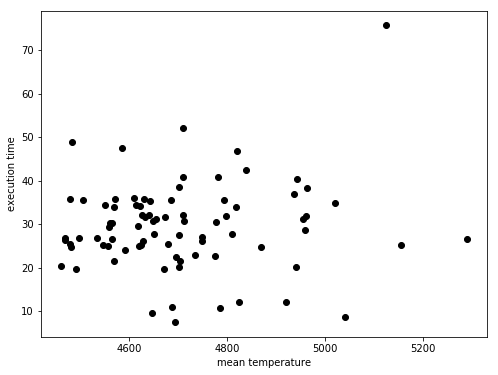

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(T_OK, t_OK/60, 'ko')
ax.set_xlabel("mean temperature")
ax.set_ylabel("execution time")

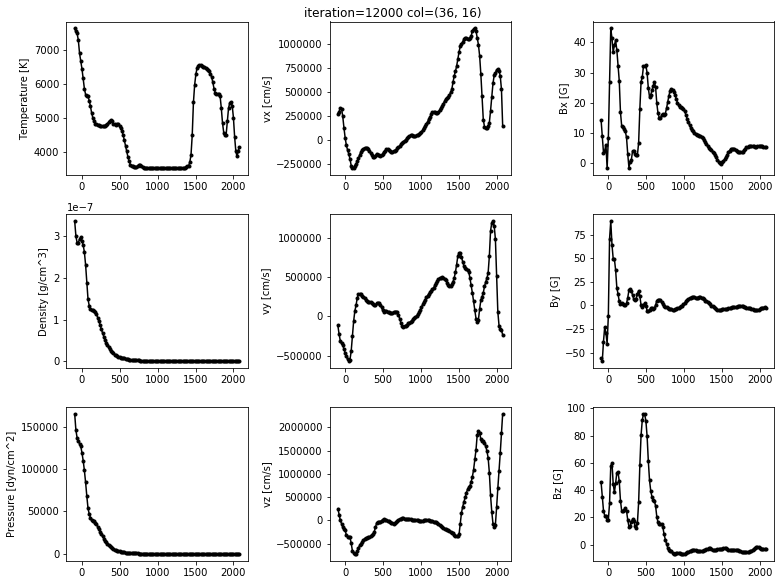

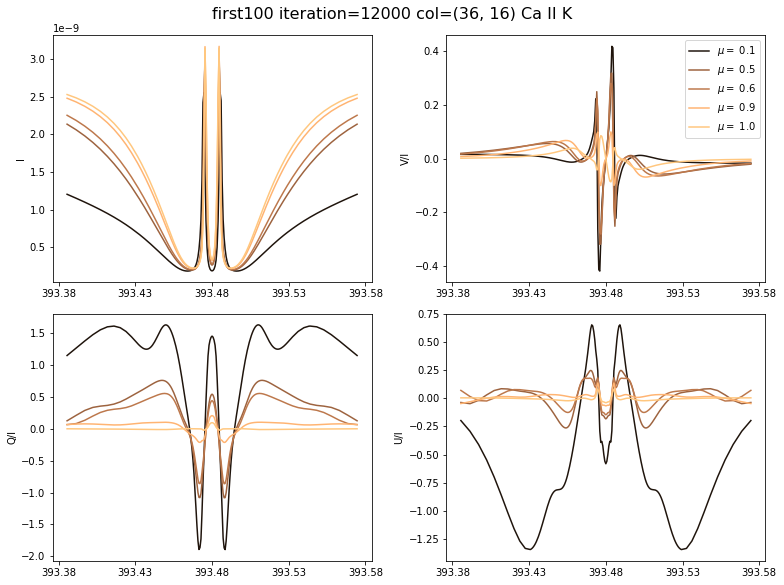

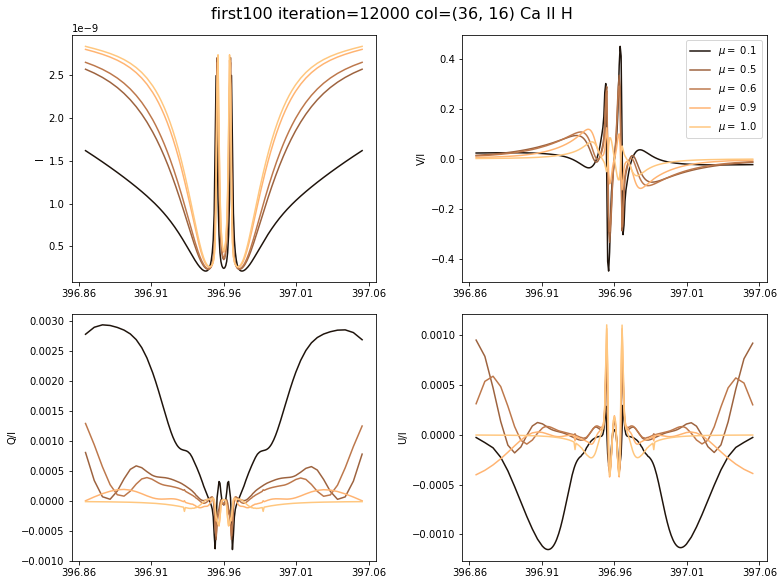

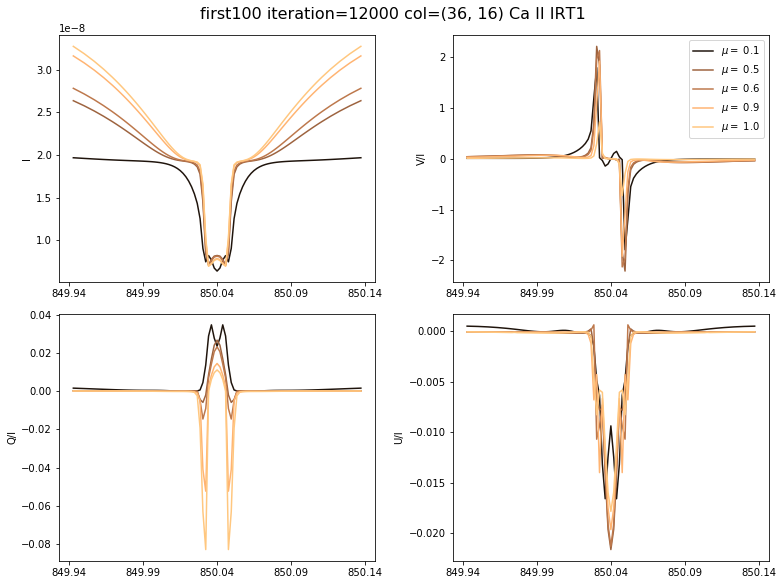

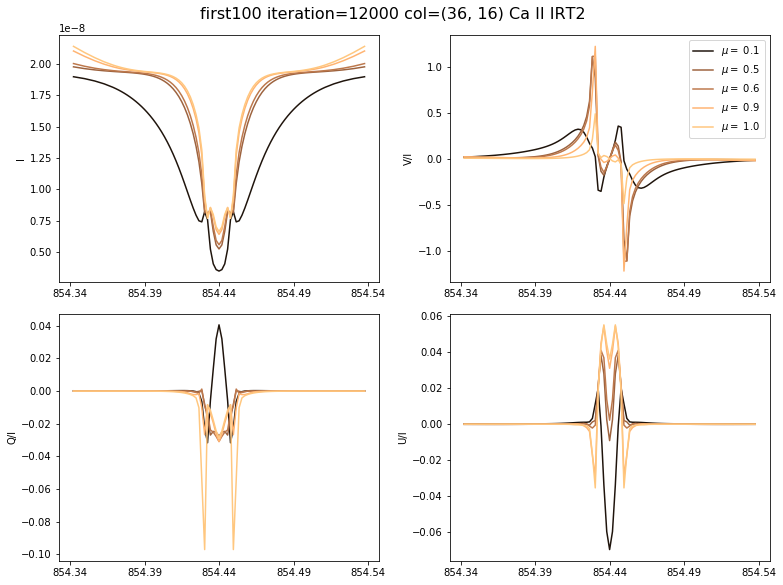

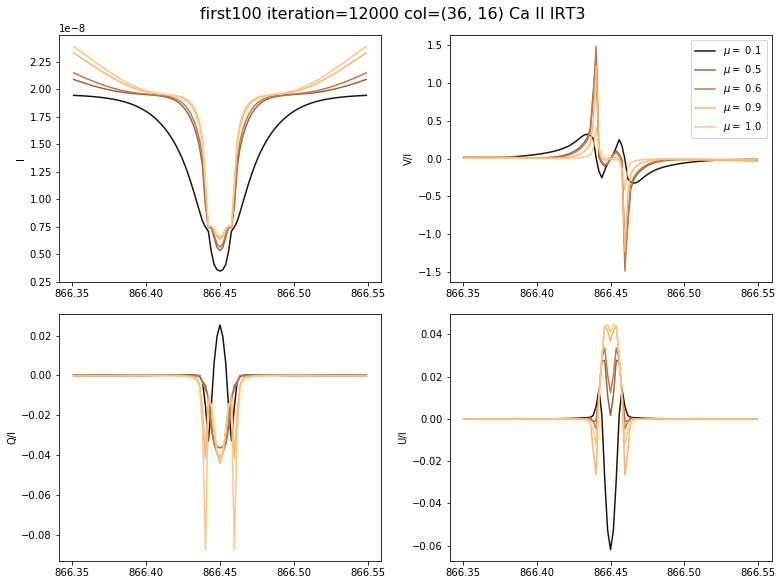

In [23]:
# Plot fastest column
muram2hanlert.plot_col(snap, *p_OK[0])
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[0])

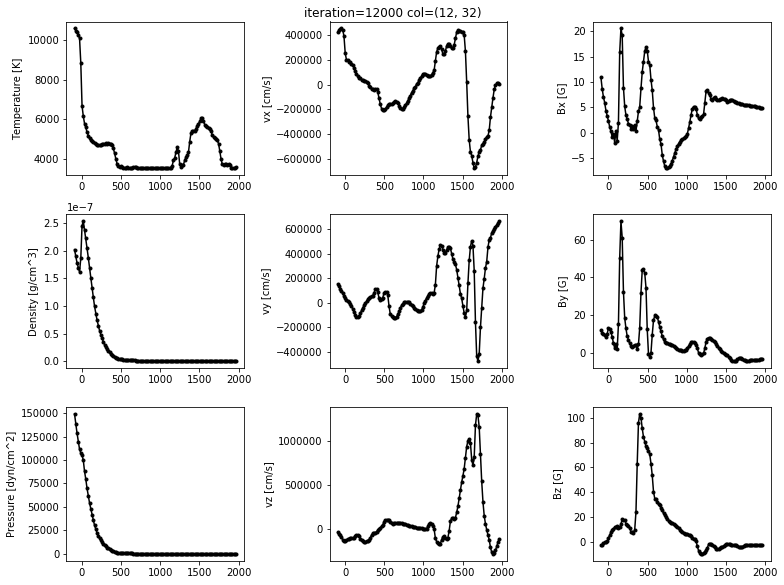

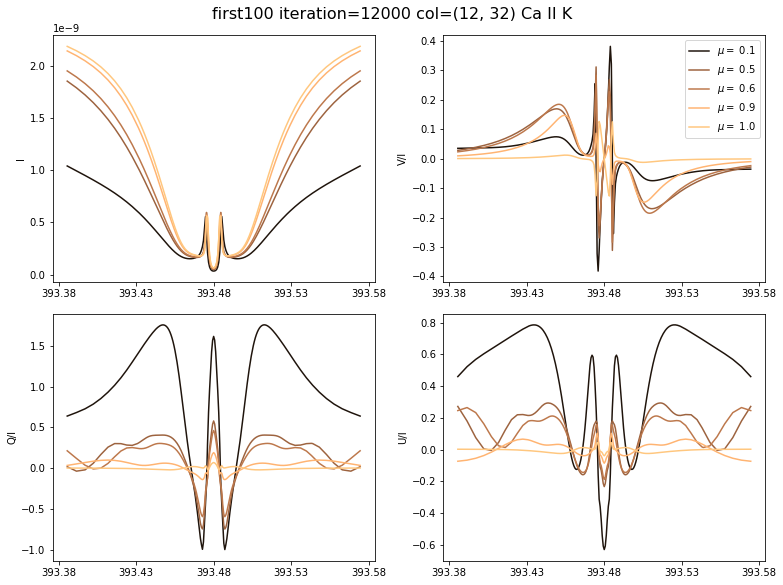

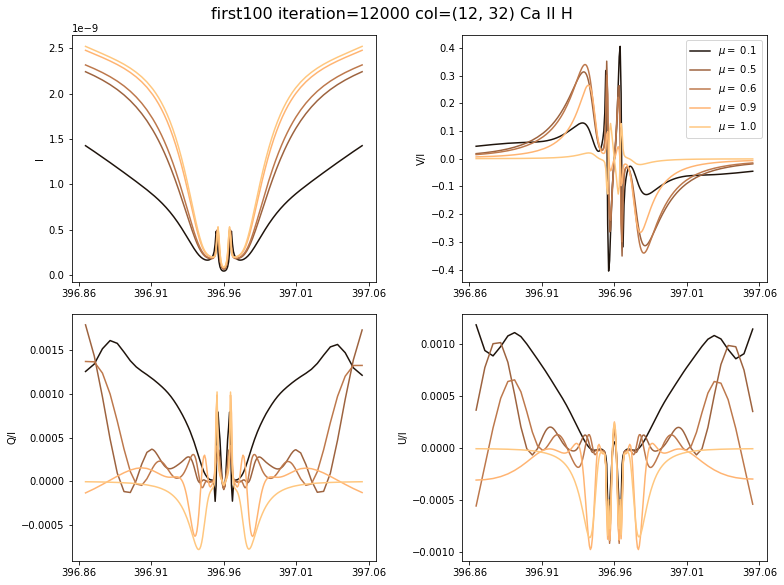

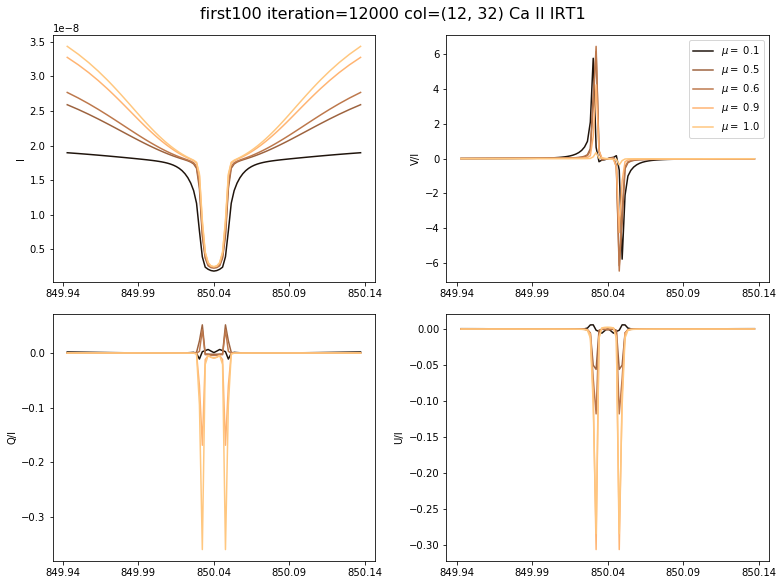

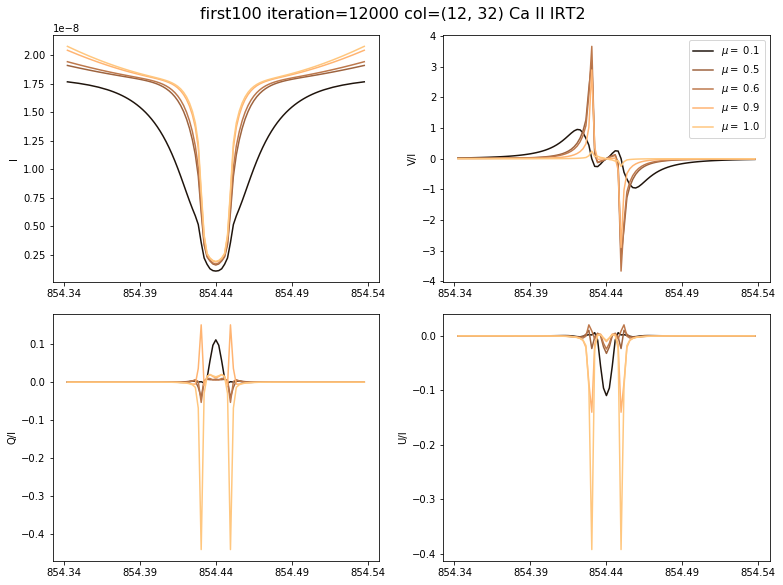

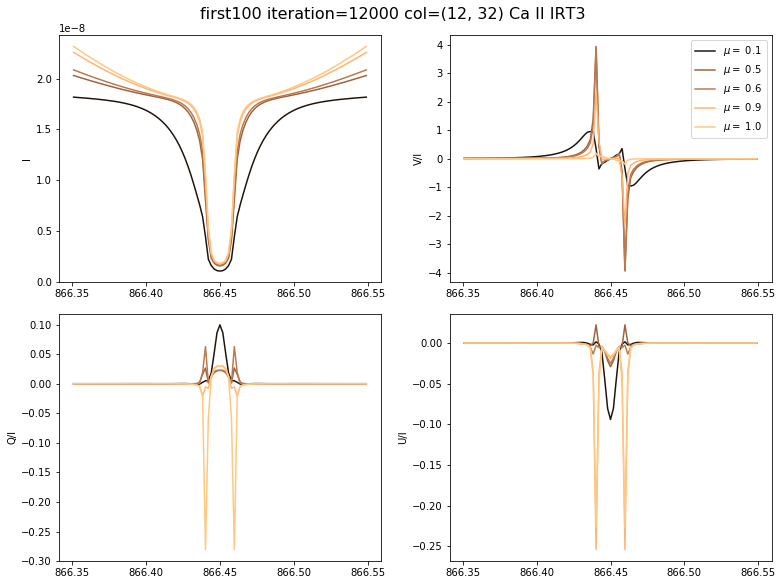

In [24]:
# middle column
muram2hanlert.plot_col(snap, *p_OK[42])
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[42])

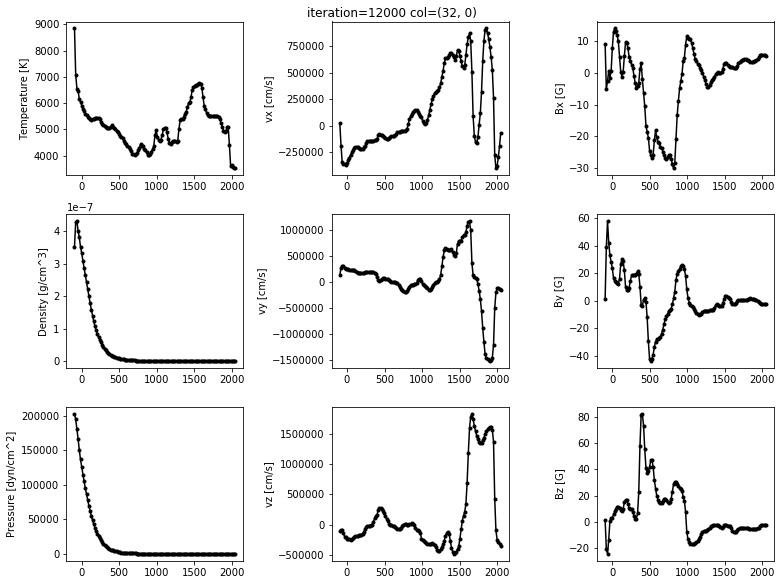

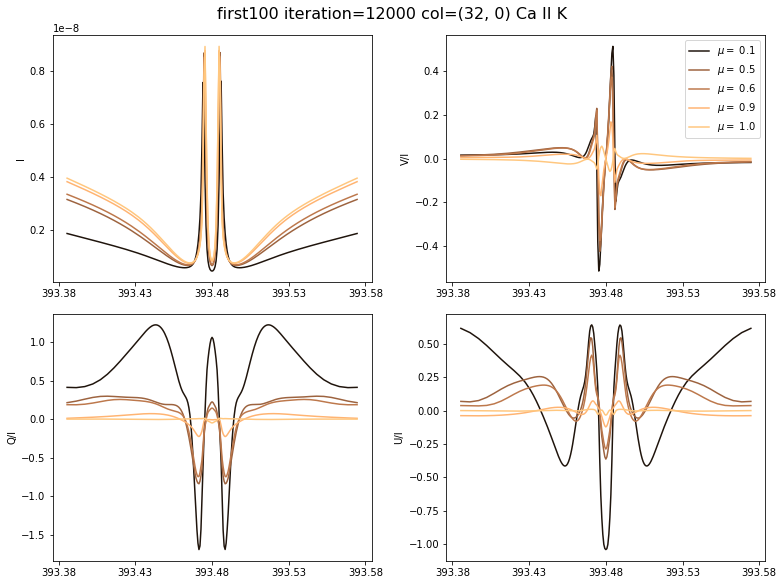

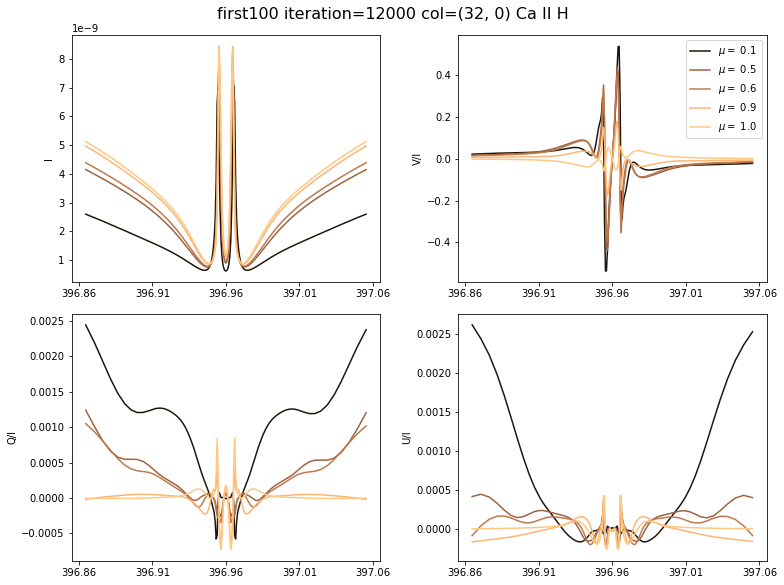

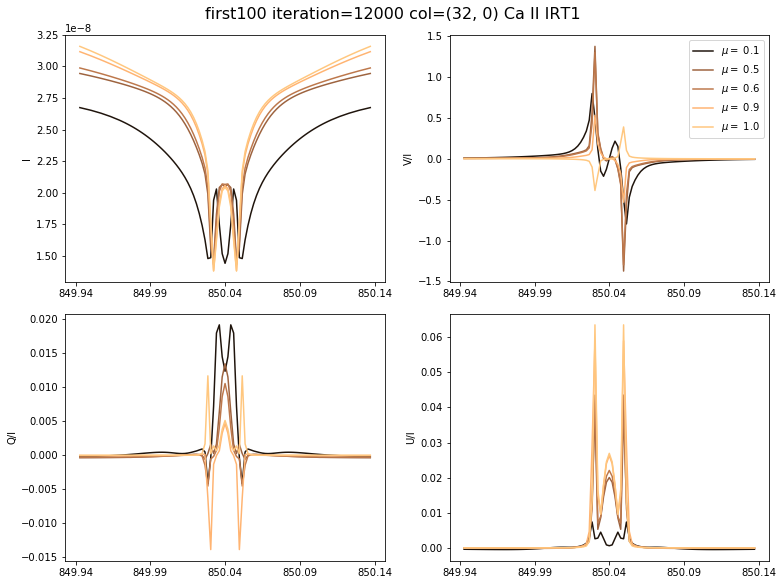

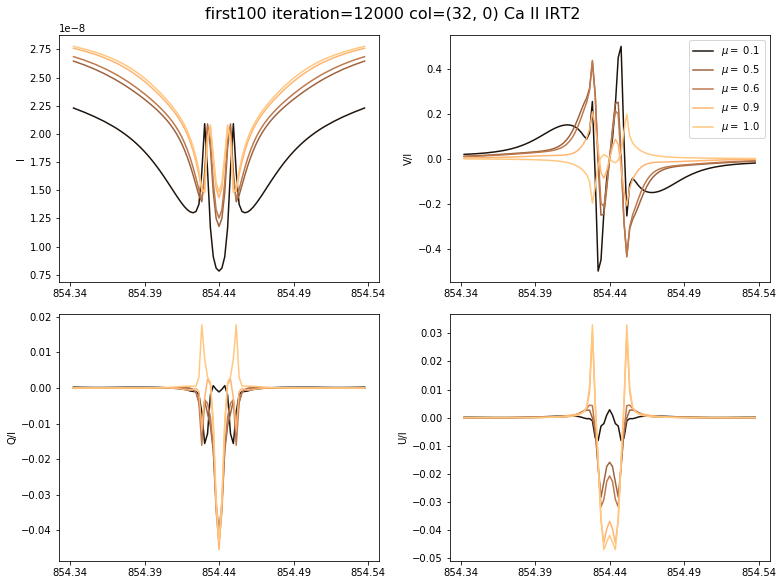

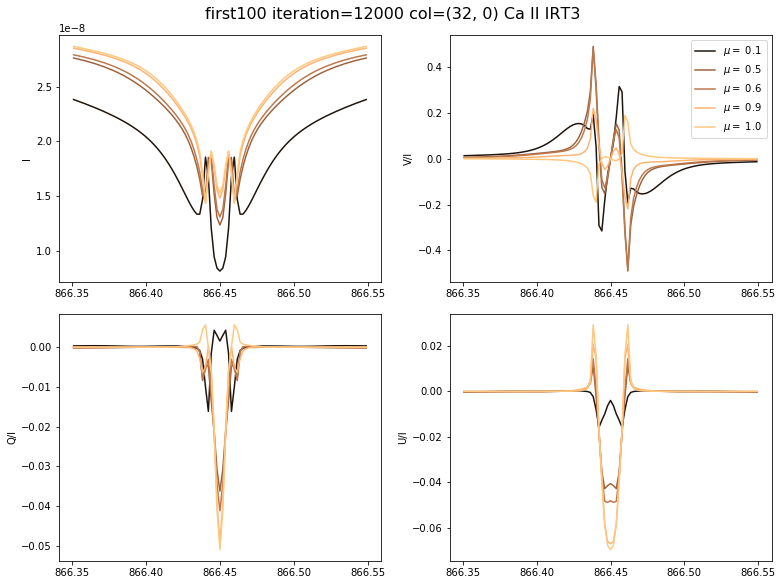

In [25]:
# slowest column
muram2hanlert.plot_col(snap, *p_OK[-1])
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[-1])

**NOTES from first100 analysis**

Reminder: cases had no vmacro

 * Fasted=(36, 16) 7.5 min, middle=(0, 36) 29.5 min, slowest=(32,0) 75.7 min
 * No clear differences in atmospheric profiles
 * No clear trend in mean temperature
 * For slowest case, very large Ca II K core intensity for slowest case

**TODO**: Remember to update MuramCube, MuramSlice to multiply Bx, By, Bz by $\sqrt{4 \pi}$

**NOTES from first test**

 * Failed when vmacro was set; gave warning about Ca shift: need larger wavelength grid?
 * Failed when vmacro = 0 and density_type='rho'; gave ERROR files about negative populations
   * Same error when density_type='pgas'
 * Failed when order of atmosphere was bottom to top
   * **Reversing the order makes the test successful!**
   * TODO: make writer ensure correct order
 * TODO: try putting vmacro back in...
 * Performance worse than FALC case, is it due to:
   * Non-uniform B field?
   * Increased number of depths in atmosphere?
 * Why does a Ndep=45 atmosphere compute so fast compared to Ndep=68 or Ndep=34?